NumPy简介1 - 数值计算与广播机制
==============

# 第二章：ndarray的创建

## 2.1 创建不同维度的 ndarray（1D / 2D / 3D / 4D）

In [ ]:
import numpy as np
np.set_printoptions(precision=4)  # 限制打印精度

**1D array:**

In [ ]:
x1 = np.array([1, 2, 3])
print(f"{x1.shape=}")
print(x1)

**2d array:**

In [ ]:
x2 = np.array([
    [1, 2, 3],
    [4, 5, 6],
])
print(f"{x2.shape=}")
print(x2)

**3d array:**

In [ ]:
# 辅助函数: 读取、展示图片

from IPython.display import display
from PIL import Image

# 下载图片:
!wget -q -O Clark.jpg https://raw.githubusercontent.com/WuDianQiBian/ml-course/master/notebooks/ch02_python_basics/assets/Clark.jpg

# 读取图片:
def read_image(path="Clark.jpg"):
    img = Image.open(path)
    img = np.asarray(img).copy()
    return img

# 展示图片:
def display_image(img):
    display(Image.fromarray(img))

In [ ]:
x3 = read_image()
print(f"{x3.shape=}")  # (H, W, C)

In [ ]:
display_image(x3)

**4d array:**

In [ ]:
# 辅助函数: 读取、展示视频
# @title
# 辅助函数，用于读取、展示图片和视频

from IPython.display import Image as IPythonImage
import imageio
import io
try:
    from moviepy.editor import VideoFileClip
except ModuleNotFoundError:
    from moviepy import VideoFileClip

# 下载gif:
!wget -q -O ClarkFalling.gif https://raw.githubusercontent.com/WuDianQiBian/ml-course/master/notebooks/ch02_python_basics/assets/ClarkFalling.gif

# 读取gif:
def read_gif(gif_path="ClarkFalling.gif"):
    with VideoFileClip(str(gif_path)) as clip:
        video = np.stack([frame for frame in clip.iter_frames()], axis=0)  # shape: (T, H, W, C)
    return video

# 展示gif:
def display_video_as_gif(video, fps=10, loop=0):
    buf = io.BytesIO()
    imageio.mimsave(buf, video, format="gif", fps=fps, loop=loop)
    display(IPythonImage(data=buf.getvalue(), format="gif"))

In [ ]:
x4 = read_gif()
print(f"{x4.shape=}")  # (N, H, W, C)

In [ ]:
display_video_as_gif(x4)

## 2.2 查看数组信息（shape / ndim / size / dtype）

In [ ]:
def show_info(x: np.ndarray):
    print(f"{x.ndim=}, {x.shape=}, {x.size=}, {x.dtype=}")

show_info(x1)
show_info(x2)
show_info(x3)
show_info(x4)

**常见dtype:**
| 类别        | dtype            | 每元素字节数 | 说明与常见用途                      |
| --------- | ---------------- | -----: | ---------------------------- |
| **布尔**    |  `bool` ❤️ |      1 | 布尔值（`True / False`），常用于 mask |
| **有符号整数** | `int8`           |      1 | 小范围整数，节省内存（如标签）           |
|           | `int16`          |      2 | 中小范围整数                       |
|           | `int32` ❤️         |      4 | **最常用整数类型之一**                |
|           | `int64`          |      8 | 较高精度的整数类型                |
| **无符号整数** | `uint8` ❤️         |      1 | **图像数据常用（0–255）**            |
|           | `uint16`         |      2 | 深度图、传感器数据                    |
|           | `uint32`         |      4 |                              |
|           | `uint64`         |      8 |                              |
| **浮点数**   | `float16`  ❤️      |      2 | **低精度浮点，显存/内存敏感场景**              |
|           | `float32` ❤️       |      4 | **最常用浮点类型（ML / DL 标准）**      |
|           | `float64`        |      8 | NumPy 默认浮点，精度高、占用大，一般不如 `float32` 常用           |
| **复数**    | `complex64`      |      8 | 实部+虚部各 `float32`             |
|           | `complex128`     |     16 | 实部+虚部各 `float64`             |
| **字符串**   | `str_`           |     变长 | Unicode 字符串（不推荐大量数值计算中使用）    |
| **字节串**   | `bytes_`         |     变长 | 原始字节数据                       |
| **对象**    | `object`         |     指针 | 任意 Python 对象（性能最差，尽量避免）  |


## 2.3 常见创建方式（zeros / ones / arange）

In [ ]:
a = np.zeros((2, 3), dtype=np.float32)  # 全 0, dtype 为 float32
print(a)

In [ ]:
b = np.ones((2, 3), dtype=np.int8)      # 全 1, dtype 为 int8.
print(b)

In [ ]:
c = np.arange(10, dtype=np.int32)       # 类似 range，步长默认 1
print(c)

**其他创建方式:**
| 创建方式             | 示例                                     | 作用说明                                         |
| ---------------- | -------------------------------------- | -------------------------------------------- |
| `np.full`        | `np.full((2, 3), 666)` | 创建指定形状的数组，所有元素填充为同一个值（这里是 `666`） |
| `np.empty`       | `np.empty((2, 3))`                     | 只分配内存空间，不初始化内容（速度最快，内容是未定义的）                 |
| `np.linspace`    | `np.linspace(0.0, 1.0, 5)`             | 在区间内做等间距采样（常用于数值分析、绘图）                       |
| `np.eye`         |`np.eye(3)`	                  | 创建单位矩阵（主对角线为 1，其余为 0）|
|	`np.identity`	   | `np.identity(3)`	            |与 eye 类似，只能创建方阵|

**随机数创建:**
| 创建方式             | 示例                                     | 作用说明                                         |
| ---------------- | -------------------------------------- | -------------------------------------------- |
| `np.random.rand` | `np.random.rand(2, 3)`                 | 生成服从均匀分布的随机数，范围在 `[0, 1)`                    |
| `np.random.randn`|	`np.random.randn(2, 3)`    |	标准正态分布随机数|
|	`np.random.randint`	| `np.random.randint(0, 10, (2,3))` |	整数随机数|

**模仿创建:**

| 创建方式             | 示例                                     | 作用说明                                         |
| ---------------- | -------------------------------------- | -------------------------------------------- |
| `np.zeros_like`  | `np.zeros_like(a)`                     | 按照数组 `a` 的 shape 和 dtype 创建，全填充为 `0`         |
| `np.ones_like`   | `np.ones_like(a)`                      | 按照数组 `a` 的 shape 和 dtype 创建，全填充为 `1`         |
| `np.full_like`   | `np.full_like(a, 666)`                 | 按照数组 `a` 的 shape 和 dtype 创建，全填充为指定值          |
| `np.empty_like`  | `np.empty_like(a)`                     | 按照数组 `a` 的 shape 和 dtype 创建，只分配空间，不初始化       |


---
# 第三章：ufunc（逐元素运算）

## 3.1 加减乘除

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(f"{a + b = }")
print(f"{a - b = }")
print(f"{a * b = }")
print(f"{a / b = }")

# 3.2 思考题: 如何让视频变亮?
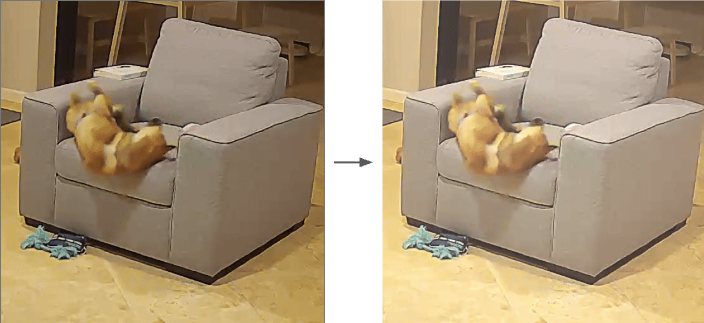

In [ ]:
video = read_gif()

# 视频变亮:
video_light = video + 40.0  # 注释: uint8+float, 隐式转为dtype=np.float64

# 约束到[0, 255]，并转回unit8:
video_light = np.clip(video_light, 0, 255).astype(np.uint8)

# 展示视频:
display_video_as_gif(video_light)

## 3.3 ufunc 函数示例

In [ ]:
x = np.arange(-2, 3, dtype=np.float32)
print(f"{x                    = }")
print(f"{np.exp(x)            = }")  # 逐元素幂运算
print(f"{np.sin(x)            = }")  # 逐元素正弦运算
print(f"{np.maximum(x, 0)     = }")  # 逐元素和0取较大值
print(f"{np.minimum(x, 0)     = }")  # 逐元素和0取较小值
print(f"{np.where(x<0, -1, 1) = }")  # 逐元素条件选择

**常见ufunc函数:**
**常见 ufunc 函数：**
| 类别 | 代表 ufunc / 运算符 | 说明 |
| ---- | ------------------ | ---- |
| **算术运算** | `add (+)`, `subtract (-)`, `multiply (*)`, `divide (/)` | 逐元素四则运算 |
| | `power (**)` | 幂运算 |
| | `floor_divide (//)` | 向下取整的整除 |
| | `mod (%)` | 取模 |
| | `negative (-x)` | 取相反数 |
| | `positive (+x)` | 保持正号（很少单独用） |
| **比较运算** | `greater (>)`, `greater_equal (>=)` | 逐元素比较 |
| | `less (<)`, `less_equal (<=)` | 返回 bool ndarray |
| | `equal (==)`, `not_equal (!=)` | 相等 / 不等 |
| **逻辑运算** | `logical_and`, `logical_or` | 逐元素逻辑运算（bool） |
| | `logical_not`, `logical_xor` | |
| **位运算** | `bitwise_and (&)`, `bitwise_or (\|)` | 按位运算（整数 / bool） |
| | `bitwise_xor (^)`, `bitwise_not (~)` | `~x` 等价于 `bitwise_not(x)` |
| **三角函数** | `sin`, `cos`, `tan` | 常见三角函数 |
| | `arcsin`, `arccos`, `arctan` | 反三角函数 |
| | `arctan2` | 带象限信息的反正切 |
| **指数与对数** | `exp`, `exp2` | 指数运算 |
| | `log`, `log10`, `log2` | 对数运算 |
| | `log1p` | 数值稳定的 `log(1 + x)` |
| **幂与根** | `sqrt`, `square`, `cbrt` | 平方根、平方、立方根 |
| **取整与符号** | `floor`, `ceil`, `round` | 向下 / 向上 / 四舍五入 |
| | `rint`, `trunc` | 舍入相关 |
| | `sign`, `abs` | 符号 / 绝对值 |
| **选择与裁剪** | `where` | 逐元素条件选择 |
| | `maximum`, `minimum` | 逐元素 max / min |
| | `clip` | 区间裁剪 |
| **数值判定** | `isnan`, `isinf` | NaN / Inf 判断 |
| | `isfinite` | 是否为有限值 |

ufunc API: https://numpy.org/doc/stable/reference/ufuncs.html

## 3.4 ufunc 总结

ufunc（universal function）是 NumPy 中用于逐元素数值计算的核心机制。

- 主要用于对 ndarray 进行数值计算
- 逐元素运算：对数组中每个位置独立计算（element-wise）
- 支持 out 参数与 in-place 写法，用于控制结果写入位置、减少额外内存分配


In [ ]:
# 原地运算与out参数的写法
np.sin(x, out=x)  # out参数: 从x读入，写入x本身
x += 1.0          # 原地运算: 从x读入，写入x本身

---
# 第四章：Broadcasting

## 4.1 Shape不兼容怎么办?

In [ ]:
X = np.arange(12).reshape(3, 4)  # reshape用于改变数组形状，内容不变。
Y = np.arange(3)
print(f"{X.shape=}\n{Y.shape=}")


**输入:**
*   `X` 是 `3x4` 的矩阵
*   `Y` 是长度为`3`的向量

**输出:**

希望 `Y` 中每个元素加到 `X` 的每行上。

<br>

**示例:**


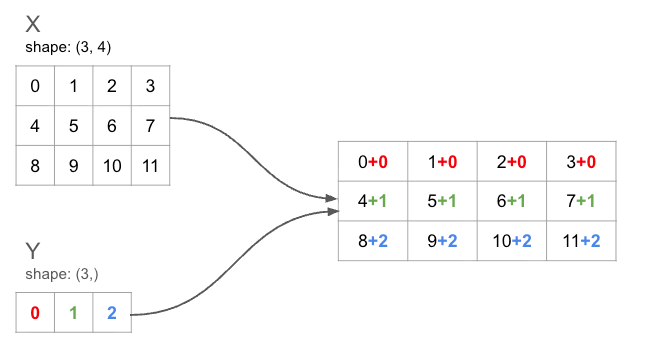


In [ ]:
# 直接相加会报错
try:
    X + Y
except ValueError as e:
    print(e)

## 4.2 长度为 1 的维度会自动广播

**例子1: (N, M) + (N, 1)**

In [ ]:
X = np.arange(12).reshape(3, 4)
Y = np.arange(3)

# 匹配形状:
Y = Y.reshape(3, 1)

# 确认形状:
print(f"{X.shape=}\n{Y.shape=}")

In [ ]:
Z = X + Y
print(f"{Z.shape=}")

In [ ]:
print(f"{X=}\n{Y=}\n{Z=}")

**解释:**

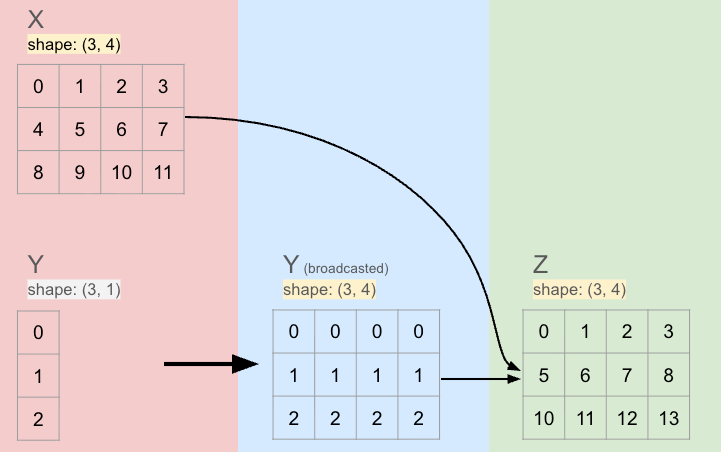

**例子2: (N, M) + (1, M)**

In [ ]:
X = np.arange(12).reshape(3, 4)
Y = np.arange(4).reshape(1, 4)
Z = X + Y

# 验证形状:
print(f"{X.shape=}\n{Y.shape=}\n{Z.shape=}")

**解释:**

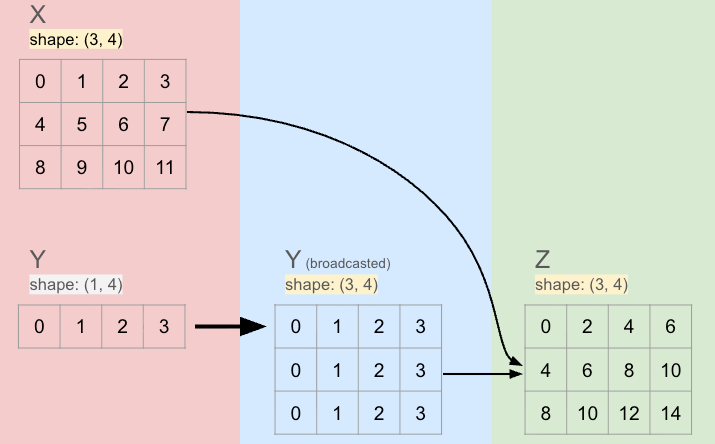

**例子3: 广播失败**
- 如果两个数组对齐后，在任意一个维度上不匹配（既不相等、也不是1），那么整个 broadcasting 就会失败。

In [ ]:
#           不匹配
#            👇
X = np.zeros((5, 4, 1))
Y = np.zeros((6, 1, 3))

print(f"{X.shape=}\n{Y.shape=}")

In [ ]:
try:
    X + Y
except ValueError as e:
    print('ValueError:', e)

## 4.3 broadcasting 规则

对于两个ndarray，一一比较它们的每个维度:
- 如果长度相同便合法
- 如果长度不同、且有一个是1: 是1的变成对方
- 如果长度不不同、且都不是1: 不合法

## 4.4 两个思考题

In [ ]:
# Short version:

video = read_gif()

T = video.shape[0]
t = np.linspace(0, 1, T)

twist = t + 0.15 * np.sin(2 * np.pi * 0.6 * t)
delta = -80 * np.cos(2 * np.pi * 2.5 * twist) - 80


import matplotlib.pyplot as plt

plt.plot(delta)

video = video + delta.reshape(-1, 1, 1, 1)

video = np.clip(video, 0, 255).astype(np.uint8)
display_video_as_gif(video)

**思考1: 如何用broadcasting将视频在明、暗之间切换 (鬼片效果)?**
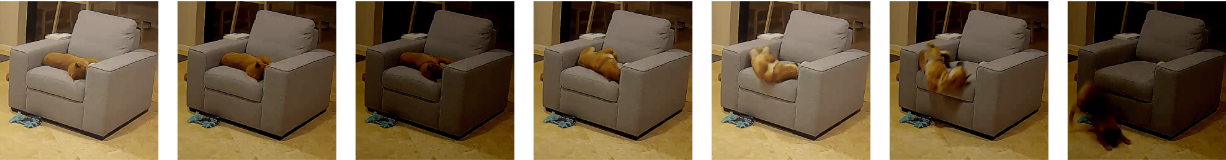


In [ ]:
# 读取视频
video = read_gif()
num_frames = video.shape[0]  # 帧数

# 生成递增序列: [0, 0.353, 0.706, 1.059, 1.412, ..., 31.4159]
x = np.linspace(0, 10 * np.pi, num_frames)  # Shape: (num_frames,)

# 使用 cos 函数，在-1到1之间震荡: [1, ... 0, ... -1, ... 0, ... 1, ...]
y = np.cos(x) # Shape: (num_frames,)

# 打印 y 确认
print(y)

In [ ]:
# 生成增益向量, 在-100到0之间震荡
delta = y * 50 - 50  # Shape: (num_frames,)

# 匹配shape: (num_frames, 1, 1, 1)
delta = delta.reshape(-1, 1, 1, 1)  # reshape可以传入一个-1，自动适配维度

# 确认shape:
print(f"{video.shape = }")
print(f"{delta.shape = }")

In [ ]:
# broadcasting:
video_new = video + delta

# 后处理、展示视频
video_new = np.clip(video_new, 0, 255).astype(np.uint8)
display_video_as_gif(video_new)

**思考2: 如何用broadcasting给图片加入径向渐变效果?**
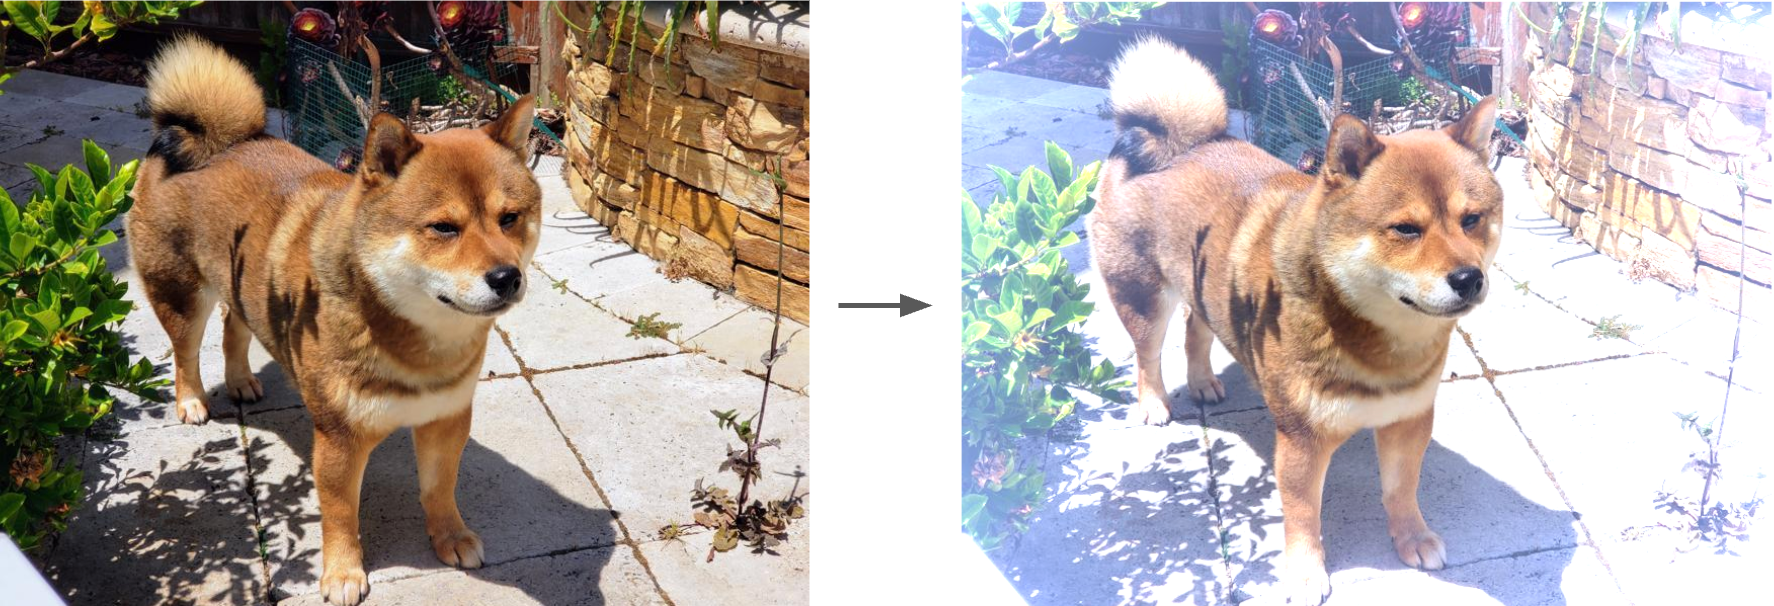

In [ ]:
# 读取图片:
image = read_image()

# 拿到高度、宽度
H, W, _ = image.shape

# 生成纵坐标、横坐标
y = np.arange(H).reshape(H, 1)                        # (H, 1)
x = np.arange(W).reshape(1, W)                        # (1, W)

# 计算每个像素到图像中心的距离（关键!)
dist = np.sqrt((y - H/2) ** 2 + (x - W/2) ** 2)       # (H, 1) + (1, W) -> (H, W)
# 注释: **2是平方运算

# 展示中间结果 dist:
dist_image = dist.clip(0, 255).astype(np.uint8)
display_image(dist_image)

In [ ]:
# 将距离normalize到[0, 1), 作为权重
dist_norm = dist / (dist.max() + 1e-12)               # (H, W)

# 生成叠加层:
glow_color = np.array([150, 180, 255])                # 月光色, shape: (3,)
glow_color = glow_color.reshape(1, 1, 3)              # (3,) -> (1, 1, 3)
glow_image = glow_color * dist_norm.reshape(H, W, 1)  # (1, 1, 3) + (H, W, 1) -> (H, W, 3)

# 叠加到原始图片:
final_image = image + glow_image

# 后处理、展示图片:
final_image = final_image.clip(0, 255).astype(np.uint8)
display_image(final_image)

## 4.5 维数ndim不同: 建议手动对齐

In [ ]:
X = np.zeros((6, 5, 4, 1, 2))
Y = np.ones((4, 3, 2))

Y = Y.reshape(1, 1, 4, 3, 2)  # 手动对齐

Z = X + Y
print(f"{X.shape=}\n{Y.shape=}\n{Z.shape=}")

### 4.5.1 非手动对齐的示例 (不推荐)

**不同维度参与广播**

规则：



*   维数不同，先右对齐
*   短的在前面补1
*   遵循上面的broadcast规则。

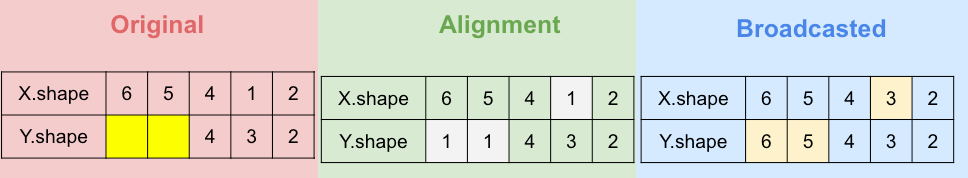


In [ ]:
X = np.zeros((6, 5, 4, 1, 2))
Y = np.ones((4, 3, 2))
Z = X + Y
print(f"{X.shape=}\n{Y.shape=      }\n{Z.shape=}")

**特例：向量与 Tensor 运算（在最后一维广播）**
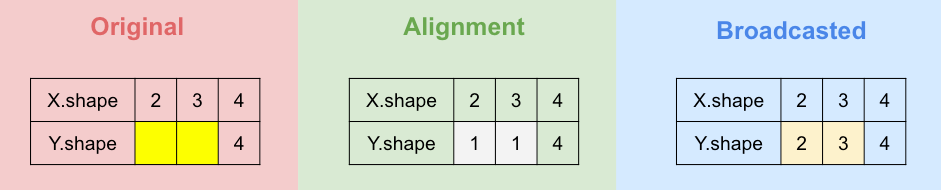

In [ ]:
X = np.zeros((2, 3, 4))
Y = np.arange(4)
Z = X + Y
print(f"{X.shape=}\n{Y.shape=}\n{Z.shape=}")

---
# 第五章：矩阵乘法（@ / np.matmul）

## 5.1 二维矩阵：传统矩阵乘法

**矩阵乘法规则**

- $C = A \cdot B$
- $C[i, j] = A[i, :] \cdot B[:, j]$  (`A的第i行`与`B的第j列`做内积)

**形状变化**

- $A: (m, n)$  
- $B: (n, p)$  
- $C: (m, p)$


In [ ]:
A = np.arange(6).reshape(2, 3)
B = np.arange(12).reshape(3, 4)
C = A @ B
print(f"{A.shape=}\n{B.shape=}\n{C.shape=}")

In [ ]:
print(f"{A=}\n{B=}\n{C=}")

## 5.2 高维矩阵：batch 维度广播 + 最后两维矩阵乘法

**规则总结：**

- 最后两维做矩阵乘法：`(..., M, K) @ (..., K, N) -> (..., M, N)`
- 前面的维度视为 batch，遵守普通 broadcasting 规则

In [ ]:
X = np.zeros((6, 5, 4,         3, 2))
Y = np.zeros((6, 5, 1,         2, 7))
#               👆              👆
#             batch维          矩阵维
#
#               ⬇              ⬇
#           (broadcast)      (矩阵乘法)
#               ⬇              ⬇
# 输出维度:   (6, 5, 4          3, 7)

Z = X @ Y
print(f"{X.shape = }\n{Y.shape = }\n{Z.shape = }")

## 5.3 输入是向量 (不常用)

In [ ]:
# 1. 向量乘向量，结果为内积（点乘）
X = np.arange(3)                   # (3,)
Y = np.ones(3)                     # (3,)
Z = X @ Y                          # ()         # 标量, scalar

In [ ]:
# 2. 向量乘矩阵，向量视为行向量:
X = np.arange(3)                   # (3,)
Y = np.arange(12).reshape(3, 4)    # (3, 4)
Z = X @ Y                          # (4,)       # 输出是行向量，列的维度自动消掉

Y = np.arange(24).reshape(2, 3, 4) # (2, 3, 4)  # Y 是高维，前面为batch
Z = X @ Y                          # (2, 4)

In [ ]:
# 3. 矩阵乘向量，向量视为列向量:
X = np.arange(12).reshape(3, 4)   # (3, 4)
Y = np.arange(4)                  # (4)
Z = X @ Y                         # (3,)        # 输出是列向量，行的维度自动消掉

X = np.arange(24).reshape(2, 3, 4) # (2, 3, 4)  # X 是高维，前面为batch
Z = X @ Y                          # (2, 3)

# 思考题
## Sepia（复古）风格转换

Sepia 是一种常见的复古色彩风格，整体呈现偏暖、偏棕色的效果，常见于老照片或怀旧滤镜中。
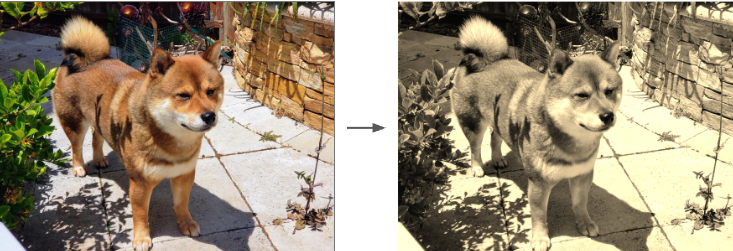



<br>

## 数学形式
从数学角度看，Sepia 风格可以看作一次**线性的颜色变换**。
将每个像素的颜色表示为一个 **RGB 列向量**：

$$
\mathbf{c} =
\begin{bmatrix}
R \\
G \\
B
\end{bmatrix}
$$

Sepia 转换可以写成矩阵乘法：

$$
\mathbf{c}' = M \mathbf{c}
$$

其中颜色变换矩阵 \( M \) 为：

$$
M =
\begin{bmatrix}
0.393 & 0.769 & 0.189 \\
0.349 & 0.686 & 0.168 \\
0.272 & 0.534 & 0.131
\end{bmatrix}
$$

该矩阵通过对 RGB 三个通道进行线性组合，将原始颜色映射到 Sepia 风格的颜色空间。

<br>

## 问题
如何用 NumPy 将一张 `(H, W, C)` 格式的图片转换成 Sepia 风格？


**提示：**

- `M.T` 表示矩阵转置
- 请仅使用本期视频中学到的知识点
- 不要使用 for 循环
- 结果裁剪到 `[0, 255]`，转回 `uint8`，并调用`display_image`函数展示


In [ ]:
image = read_image()

M_sepia = np.array([
    [0.393, 0.769, 0.189],
    [0.349, 0.686, 0.168],
    [0.272, 0.534, 0.131],
], dtype=np.float32)

# 转置、对齐维度:
mat = M_sepia.T.reshape(1, 3, 3)

# 确认维度:
print(f"{image.shape = }")
print(f"{mat.shape   = }")

# 矩阵乘法 + broadcasting:
image_sepia = image @ mat

# 后处理，展示图片:
image_sepia = np.clip(image_sepia, 0, 255).astype(np.uint8)
display_image(image_sepia)